In [2]:
import scipy
import bagpy
import numpy as np
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib import rc
import statistics
import regex as re
from transforms3d.quaternions import quat2mat

/home/zozan/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_topics(b):
    csv_files = []
    for topic in b.topics:
        #print(topic)
        data = b.message_by_topic(topic)
        csv_files.append(data)
    return csv_files


In [9]:
bag = "./kalib_test.bag"
b = bagreader(bag)
csv_files = get_topics(b)
print(csv_files)

[INFO]  Data folder ./kalib_test already exists. Not creating.
['./kalib_test/kalipen-joy.csv', './kalib_test/rosout.csv', './kalib_test/rosout_agg.csv', './kalib_test/tf.csv', './kalib_test/vrpn_client_node-Kalipen-pose.csv']


In [10]:
captured_poses = pd.read_csv(csv_files[-1])
print(captured_poses)

              Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     1.710769e+09      538498         1710768809            34123906   
1     1.710769e+09      538499         1710768809            44120004   
2     1.710769e+09      538500         1710768809            54247646   
3     1.710769e+09      538501         1710768809            64280515   
4     1.710769e+09      538502         1710768809            74246125   
...            ...         ...                ...                 ...   
1190  1.710769e+09      539688         1710768818           954189089   
1191  1.710769e+09      539689         1710768818           964210236   
1192  1.710769e+09      539690         1710768818           974191492   
1193  1.710769e+09      539691         1710768818           984151182   
1194  1.710769e+09      539692         1710768818           984193481   

     header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0              world         0.026953        -0.

In [50]:
#print(captured_poses['pose.orientation.x'])
#print(captured_poses['pose.orientation.y'])
#print(captured_poses['pose.orientation.z'])
#print(captured_poses['pose.orientation.w'])

qx = captured_poses['pose.orientation.x'].tolist()
qy = captured_poses['pose.orientation.y'].tolist()
qz = captured_poses['pose.orientation.z'].tolist()
qw = captured_poses['pose.orientation.w'].tolist()
x = captured_poses['pose.position.x'].tolist()
y = captured_poses['pose.position.y'].tolist()
z = captured_poses['pose.position.z'].tolist()

q = np.array([qw, qx, qy, qz])

def createT(q, p): 
    
    R = quat2mat(q)
    T = np.hstack((R, p.reshape(3, 1)))
    T = np.vstack((T, np.array([0, 0, 0, 1]).reshape(1, 4)))
    
    return T

T_ = []
for qx_, qy_, qz_, qw_, x_, y_, z_ in zip(qx, qy, qz, qw, x, y, z):
    q = np.array([qw_, qx_, qy_, qz_])
    p = np.array([x_, y_, z_])
    T_.append(createT(q, p)) 

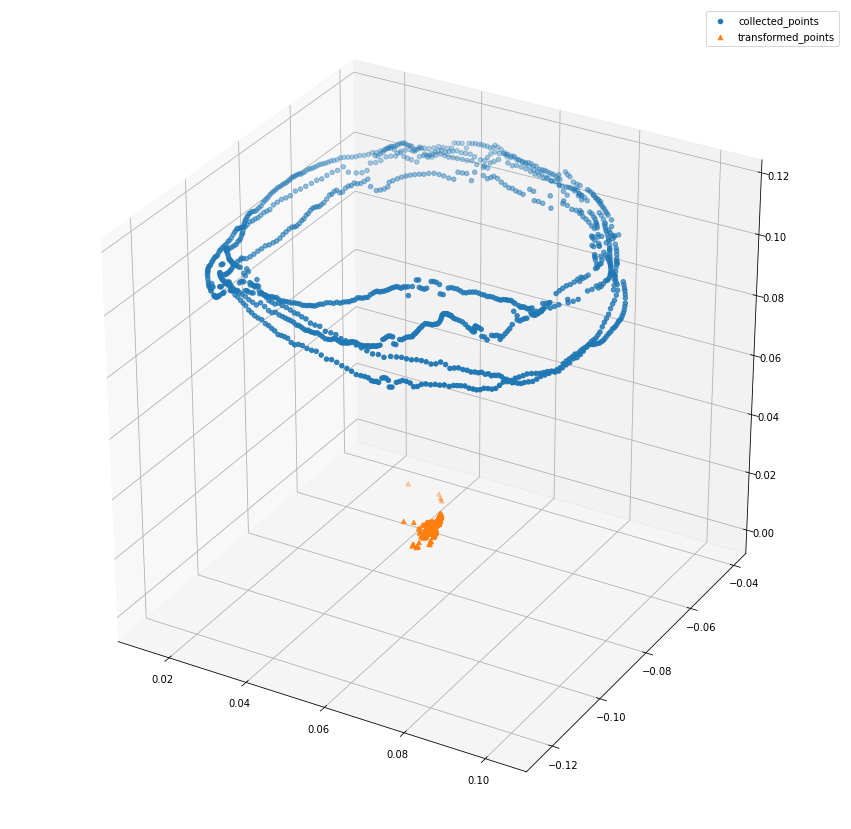

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_, y_, z_, marker='o', label="collected_points")
ax.scatter(xT_, yT_, zT_, marker='^', label='transformed_points')
ax.legend()

In [62]:
# Prikupljene tocke
x_ = [T[0, 3] for T in T_]
y_ = [T[1, 3] for T in T_]
z_ = [T[2, 3] for T in T_]

# Kalibrirane tocke
xT_ = [tfT[0, 3] for tfT in transfT]
yT_ = [tfT[1, 3] for tfT in transfT]
zT_ = [tfT[2, 3] for tfT in transfT]

T_init = np.array([[1, 0, 0, -0.01331904], 
                  [0, 1, 0, 0.0374956], 
                  [0, 0, 1, -0.10462651], 
                  [0, 0, 0, 1]])


In [61]:
transfT = [np.matmul(T, T_init) for T in T_]

## First experiment with points 

In [3]:
gt_points = [(0.5732995558493781, 0.1480859243484523, 0.8274133616400611), 
             (0.5731350161545312, 0.11819352738598436, 0.8579091646174682), 
             (0.5730960461455274, 0.008779852992567429, 0.8586062669278736), 
             (0.5741113576539, 0.010171048471832329, 0.9562854046679274), 
             (0.574507803274127, 0.06355463400303442, 1.0052244865226867), 
             (0.5737972624735023, 0.11880985414816372, 0.9577623106070321)]
x_gt = [pt[0] for pt in gt_points]
y_gt = [pt[1] for pt in gt_points]
z_gt = [pt[2] for pt in gt_points]

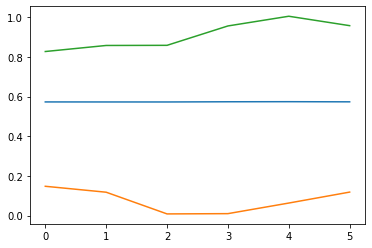

In [4]:
plt.figure()
plt.plot(range(0, len(x_gt)), x_gt) 
plt.plot(range(0, len(y_gt)), y_gt)
plt.plot(range(0, len(z_gt)), z_gt)



In [8]:
exp1 = "./ClickMarkExperiments/tocke1.csv"
exp1_csv = pd.read_csv(exp1)

exp2 = "./ClickMarkExperiments/tocke2.csv"
exp2_csv = pd.read_csv(exp2)

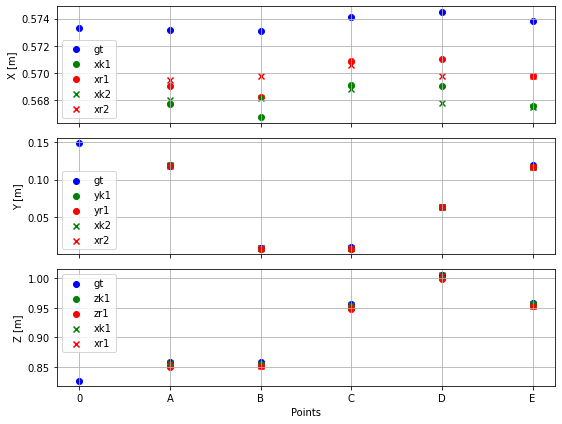

In [9]:
import matplotlib.pyplot as plt

# Data
x_= [1, 2, 3, 4, 5]
x = [0, 1, 2, 3, 4, 5]
y = [3, 5, 2, 7, 4]
labels = ['0', 'A', 'B', 'C', 'D', 'E']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Plot on each subplot
axs[0].scatter(x, x_gt, label='gt', color='b')
axs[0].scatter(x_, exp1_csv['x_marked'], label='xk1', color="g")
axs[0].scatter(x_, exp1_csv['x_robot'], label='xr1', color='r')
axs[0].scatter(x_, exp2_csv['x_marked'], label='xk2', color="g", marker="x")
axs[0].scatter(x_, exp2_csv['x_robot'], label='xr2', color='r', marker="x")
axs[0].set_ylabel('X [m]')
axs[1].scatter(x, y_gt, label='gt', color='b')
axs[1].scatter(x_, exp1_csv['y_marked'], label='yk1', color='g')
axs[1].scatter(x_, exp1_csv['y_robot'], label='yr1', color='r')
axs[1].scatter(x_, exp2_csv['y_marked'], label='xk2', color="g", marker="x")
axs[1].scatter(x_, exp2_csv['y_robot'], label='xr2', color='r', marker="x")
axs[1].set_ylabel('Y [m]')
axs[2].scatter(x, z_gt, label='gt', color='b')
axs[2].scatter(x_, exp1_csv['z_marked'], label='zk1', color='g')
axs[2].scatter(x_, exp1_csv['z_robot'], label='zr1', color='r')
axs[2].scatter(x_, exp2_csv['z_marked'], label='xk1', color="g", marker="x")
axs[2].scatter(x_, exp2_csv['z_robot'], label='xr1', color='r', marker="x")
axs[2].set_ylabel('Z [m]')
for ax in axs: 
    ax.grid()
    ax.legend(loc='best')
# Set custom x tick labels
axs[2].set_xticks(x)
axs[2].set_xticklabels([f'{label}' for label in labels])

# Set common x-axis label
axs[-1].set_xlabel('Points')


plt.tight_layout()
plt.show()



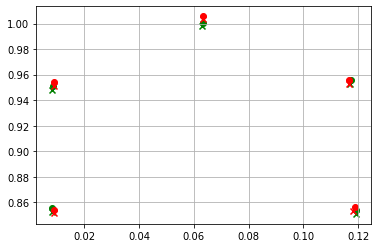

In [10]:
plt.figure()
plt.scatter(exp1_csv['y_marked'],exp1_csv['z_marked'], label='k1', color='g')
plt.scatter(exp1_csv['y_robot'], exp1_csv['z_robot'], label='r1', color='g', marker='x')
plt.scatter(exp2_csv['y_marked'],exp2_csv['z_marked'], label='k1', color='r')
plt.scatter(exp2_csv['y_robot'], exp2_csv['z_robot'], label='r1', color='r', marker='x')
plt.grid()


#plt.scatter(axs[1].scatter(x_, exp1_csv['y_marked'], label='yk1', color='g')
#axs[1].scatter(x_, exp1_csv['y_robot'], label='yr1', color='r')
#axs[1].scatter(x_, exp2_csv['y_marked'], label='xk2', color="g", marker="x")
#axs[1].scatter(x_, exp2_csv['y_robot'], label='xr2', color='r', marker="x")
#axs[1].set_ylabel('Y [m]')
#axs[2].scatter(x, z_gt, label='gt', color='b')
#axs[2].scatter(x_, exp1_csv['z_marked'], label='zk1', color='g')
#axs[2].scatter(x_, exp1_csv['z_robot'], label='zr1', color='r')
#axs[2].scatter(x_, exp2_csv['z_marked'], label='xk2', color="g", marker="x")
#axs[2].scatter(x_, exp2_csv['z_robot'], label='xr2', color='r', marker="x"))

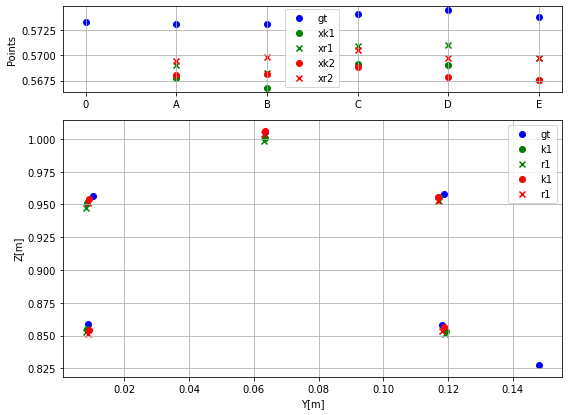

In [12]:
# Data
x_= [1, 2, 3, 4, 5]
x = [0, 1, 2, 3, 4, 5]
y = [3, 5, 2, 7, 4]
n = ['A', 'B', 'C', 'D', 'E']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot on each subplot
axs[0].scatter(x, x_gt, label='gt', color='b')
axs[0].scatter(x_, exp1_csv['x_marked'], label='xk1', color="g")
axs[0].scatter(x_, exp1_csv['x_robot'], label='xr1', color='g', marker='x')
axs[0].scatter(x_, exp2_csv['x_marked'], label='xk2', color="r")
axs[0].scatter(x_, exp2_csv['x_robot'], label='xr2', color='r', marker="x")
axs[0].set_ylabel('X [m]')
axs[0].set_ylabel('Points')
axs[0].set_xticks(x)
axs[0].set_xticklabels([f'{label}' for label in labels])
axs[1].scatter(y_gt, z_gt, label='gt', color='b')
axs[1].scatter(exp1_csv['y_marked'],exp1_csv['z_marked'], label='k1', color='g')
axs[1].scatter(exp1_csv['y_robot'], exp1_csv['z_robot'], label='r1', color='g', marker='x')
axs[1].scatter(exp2_csv['y_marked'],exp2_csv['z_marked'], label='k1', color='r')
axs[1].scatter(exp2_csv['y_robot'], exp2_csv['z_robot'], label='r1', color='r', marker='x')
for ax in axs: 
    ax.grid()
    ax.legend(loc='best')

# Set common x-axis label
axs[1].set_xlabel('Y[m]')
axs[1].set_ylabel('Z[m]')
plt.tight_layout()
plt.savefig("first_exp.pdf")
plt.show()

In [32]:
exp1_csv['y_marked']

xm1 = exp1_csv['x_marked']
ym1 = exp1_csv['y_marked']
zm1 = exp1_csv['z_marked']
#
xr1 = exp1_csv['x_robot']
yr1 = exp1_csv['y_robot']
zr1 = exp1_csv['z_robot']
#
xm2 = exp2_csv['x_marked']
ym2 = exp2_csv['y_marked']
zm2 = exp2_csv['z_marked']
# 
xr2 = exp2_csv['x_robot']
yr2 = exp2_csv['y_robot']
zr2 = exp2_csv['z_robot']

In [46]:
xm = [xm1, xm2]
ym = [ym1, ym2]
zm = [zm1, zm2]

xr = [xr1, xr2]
yr = [yr1, yr2]
zr = [zr1, zr2]

In [132]:
print("xm: {}".format(np.std(xm)))
print("ym: {}".format(np.std(ym)))
print("zm: {}".format(np.std(zm)))
print("xr: {}".format(np.std(xr)))
print("yr: {}".format(np.std(yr)))
print("zr: {}".format(np.std(zr)))

xm: 0.0007180316633960212
ym: 0.04888163068867253
zm: 0.05945079886182105
xr: 0.0008013968360026986
yr: 0.048916546675112894
zr: 0.0595294263352254


In [112]:
def get_collection(x):
    std_dev = []
    collection = {"0":[], "1":[], "2":[], "3":[], "4":[]}
    for meas in x: 
        for k, elem in enumerate(meas): 
            collection["{}".format(k)].append(elem)
    return collection

def get_std_dev(collection): 
    std_dev = {"0": [], "1": [], "2": [], "3": [], "4": []}
    for key in collection.keys(): 
        std_dev[key] = np.std(collection[key])
    return std_dev

def convert_dict_to_list(dict_): 
    return [x[1] for x in dict_.items()]

In [116]:
xm_col = get_collection(xm)
ym_col = get_collection(ym)
zm_col = get_collection(zm)
xm_std_dev = get_std_dev(xm_col)
ym_std_dev = get_std_dev(ym_col)
zm_std_dev = get_std_dev(zm_col)

In [117]:
xr_col = get_collection(xr)
yr_col = get_collection(yr)
zr_col = get_collection(zr)
xr_std_dev = get_std_dev(xr_col)
yr_std_dev = get_std_dev(yr_col)
zr_std_dev = get_std_dev(zr_col)

In [130]:
xm_std = convert_dict_to_list(xm_std_dev)
ym_std = convert_dict_to_list(ym_std_dev)
zm_std = convert_dict_to_list(zm_std_dev)
xr_std = convert_dict_to_list(xr_std_dev)
yr_std = convert_dict_to_list(yr_std_dev)
zr_std = convert_dict_to_list(zr_std_dev)

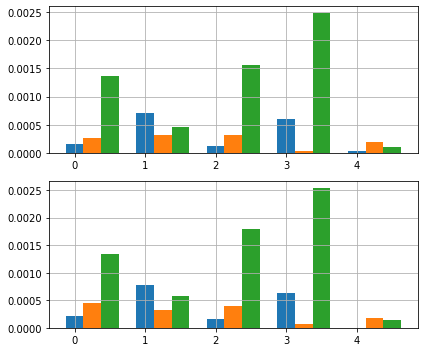

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data for four points in the form of lists
# Replace these lists with your actual data
points = ['A', 'B', 'C', 'D', "E"]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 5))

# Plotting
bar_width = 0.25
index = np.arange(len(points))
axs[0].bar(index, xm_std, bar_width, label='X')
axs[0].bar(index + bar_width, ym_std, bar_width, label='Y')
axs[0].bar(index + 2 * bar_width, zm_std, bar_width, label='Z')
axs[0].grid()
axs[1].bar(index, xr_std, bar_width, label='X')
axs[1].bar(index + bar_width, yr_std, bar_width, label='Y')
axs[1].bar(index + 2 * bar_width, zr_std, bar_width, label='Z')
axs[1].grid()
#axs[0].xlabel('Points')
#axs[0].ylabel('Standard Deviation')
#axs[0].title('Standard Deviation of X, Y, Z at Different Points')
#axs[0].xticks(index + bar_width, points)
#axs[0].legend()

plt.tight_layout()
plt.show()

In [ ]:
""""""